In [54]:
pip install yfinance


In [55]:
!pip install -q tensorflow

In [56]:
import yfinance as yf

In [57]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

In [58]:
stock = "GOOG"
google_data = yf.download(stock,start,end)


/tmp/ipython-input-58-338138405.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  google_data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [59]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2015-07-06,25.988518,26.107313,25.796659,25.821511,25610000
2015-07-07,26.095882,26.153540,25.606791,26.001941,31944000
2015-07-08,25.688801,25.982257,25.653014,25.898554,25934000
2015-07-09,25.880163,26.033749,25.863760,26.001442,36846000
2015-07-10,26.349873,26.470655,26.122226,26.159008,39134000


In [60]:
google_data.shape

(2515, 5)

In [61]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,89.665249,90.601830,88.702416,89.614208,3.012753e+07
std,46.730363,47.270115,46.211413,46.720033,1.524614e+07
min,25.688801,25.982257,25.606791,25.821511,6.809800e+06
25%,51.115662,51.760826,50.543314,51.077889,2.075290e+07
50%,73.286873,73.970804,72.518445,73.085075,2.639260e+07
75%,130.678230,132.181894,129.292975,130.654619,3.468810e+07
max,207.224548,208.212225,203.782599,204.022044,2.232980e+08


In [62]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-07-06 to 2025-07-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   2515 non-null   float64
 1   (High, GOOG)    2515 non-null   float64
 2   (Low, GOOG)     2515 non-null   float64
 3   (Open, GOOG)    2515 non-null   float64
 4   (Volume, GOOG)  2515 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [63]:
google_data.isna().sum()

,,0
Price,Ticker,
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
def plot_graph(figsize, values, column_name):
  plt.figure()
  values.plot(figsize = figsize)
  plt.xlabel("Years")
  plt.ylabel(column_name)
  plt.title(f"{column_name} of Google data")

In [66]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

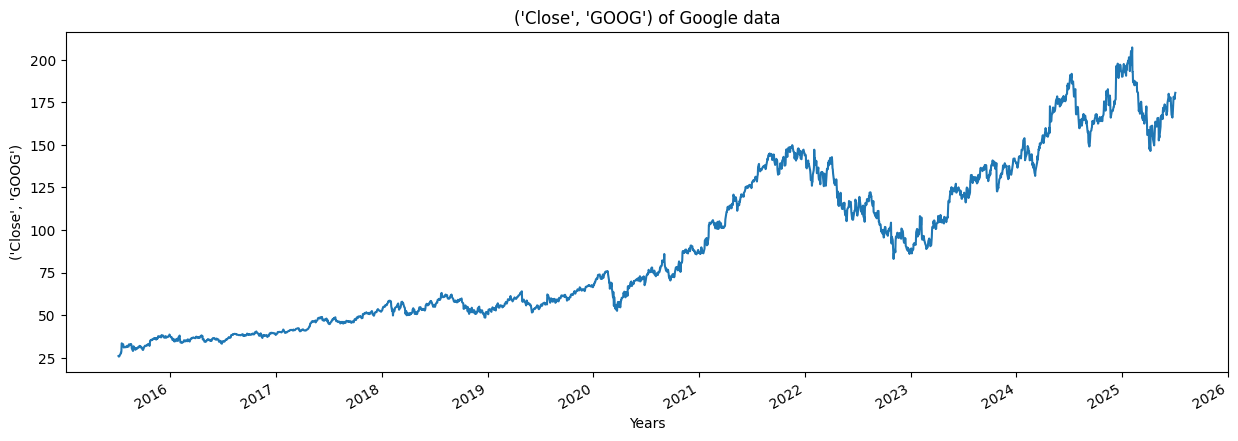

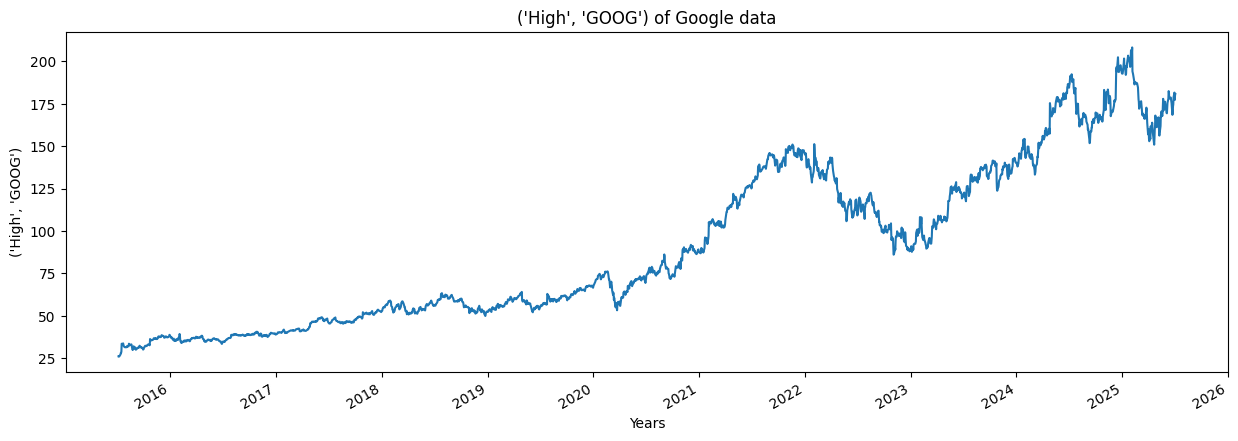

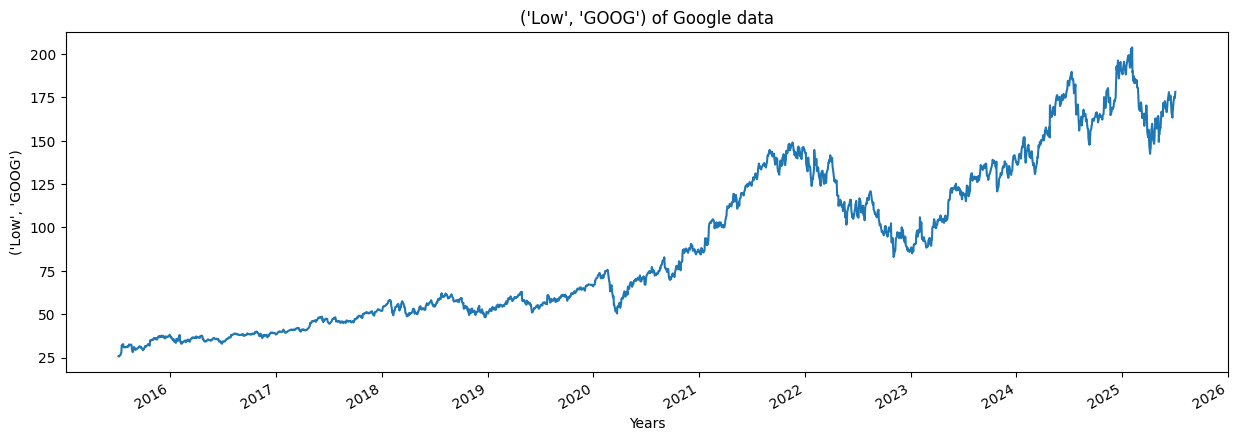

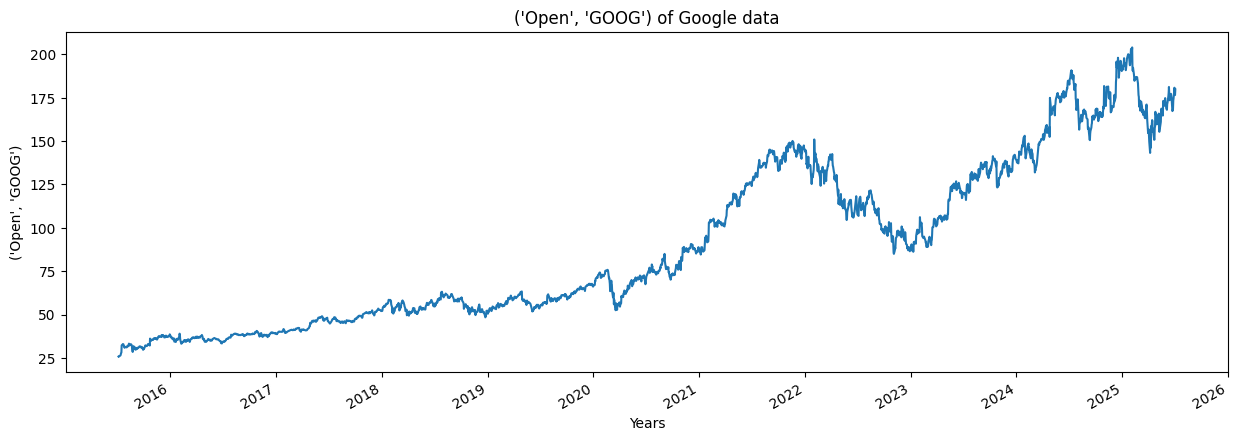

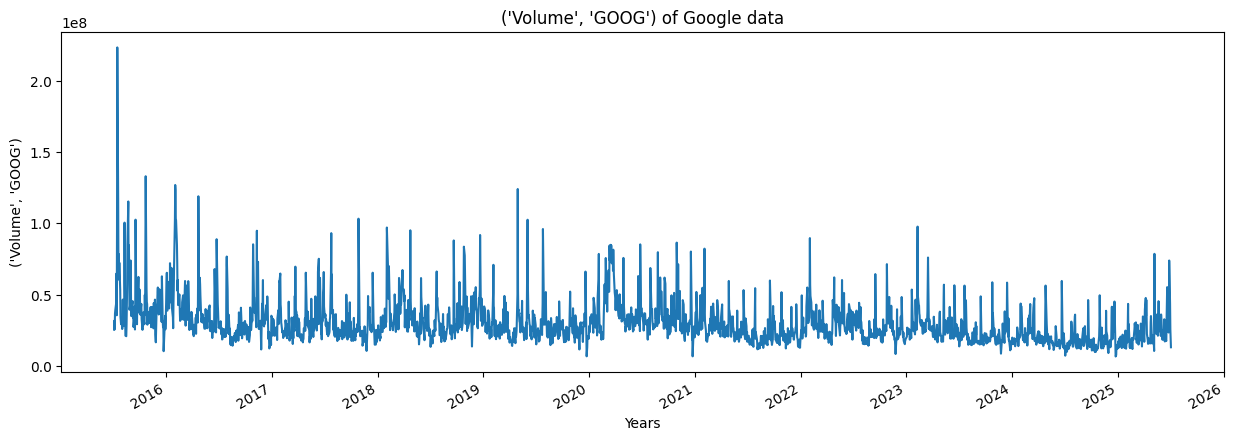

In [67]:
for coulmn in google_data.columns:
  plot_graph((15,5),google_data[coulmn], coulmn)

In [68]:
import pandas as pd
for i in range (2021,2025):
  print(i,list(google_data.index.year).count(i))

2021 252
2022 251
2023 250
2024 252


In [69]:
google_data['Moving Average for 250 days'] = google_data['Close'].rolling(250).mean()

In [70]:
google_data['Moving Average for 250 days'][0:250].tail()

,Moving Average for 250 days
Date,
2016-06-23,NaN
2016-06-24,NaN
2016-06-27,NaN
2016-06-28,NaN
2016-06-29,34.433733


<Figure size 640x480 with 0 Axes>

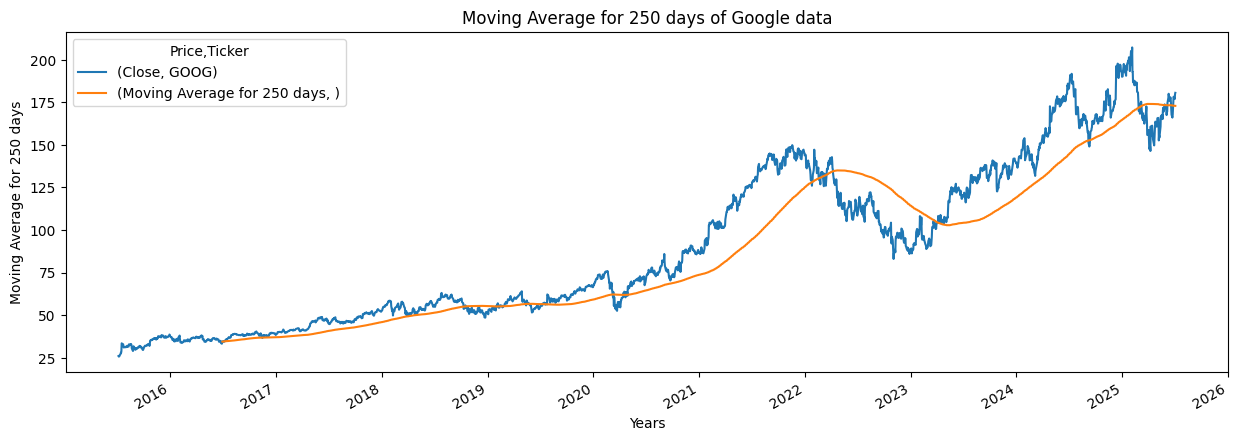

In [71]:
plot_graph((15,5), google_data[['Close','Moving Average for 250 days']], 'Moving Average for 250 days')

<Figure size 640x480 with 0 Axes>

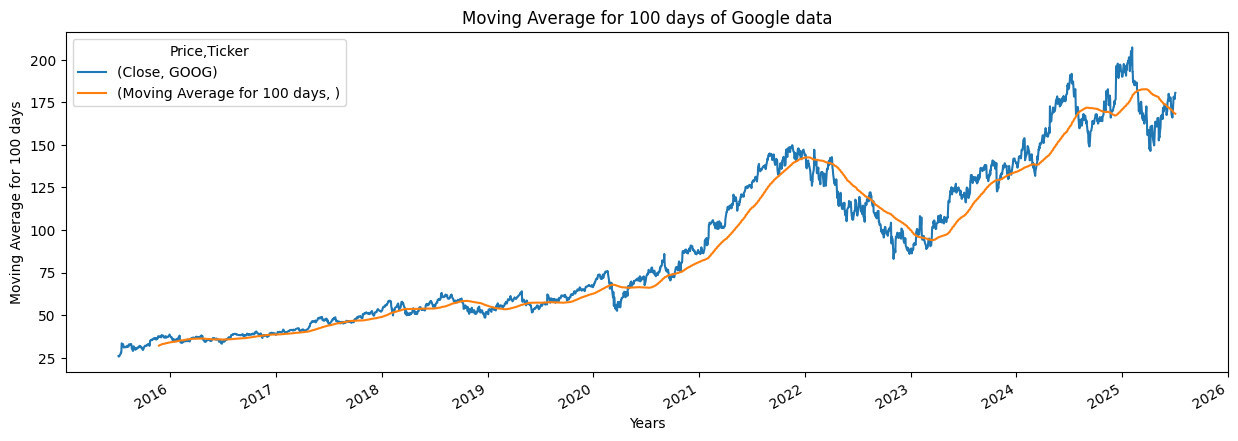

In [72]:
google_data['Moving Average for 100 days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','Moving Average for 100 days']], 'Moving Average for 100 days')

<Figure size 640x480 with 0 Axes>

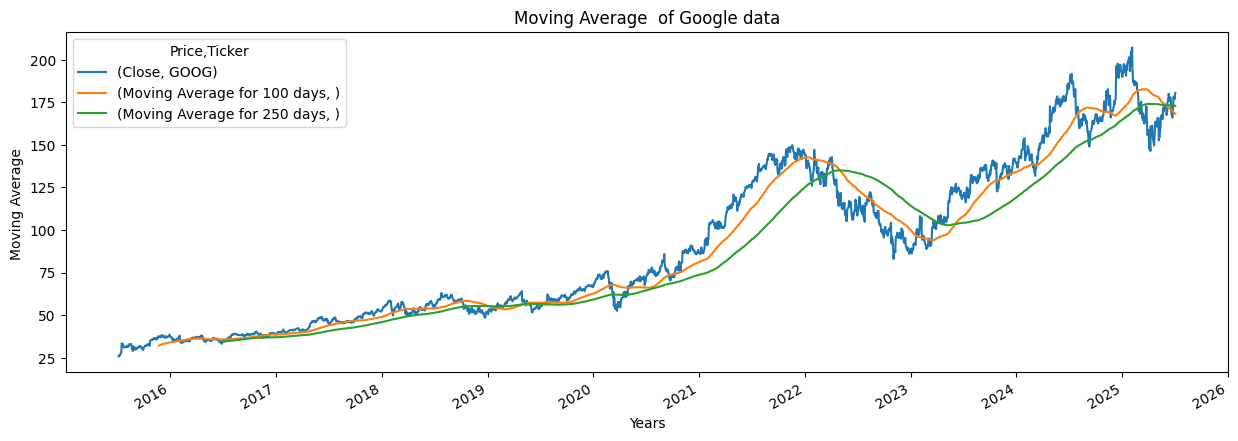

In [73]:
plot_graph((15,5), google_data[['Close','Moving Average for 100 days','Moving Average for 250 days']], 'Moving Average ')

In [74]:
close_price = google_data[['Close']]

In [75]:
max(close_price.values),min(close_price.values)

(array([207.22454834]), array([25.68880081]))

In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.00165101],
       [0.00224243],
       [0.        ],
       ...,
       [0.8330106 ],
       [0.84870994],
       [0.85306175]])

In [77]:
len(scaled_data)

2515

In [78]:
from re import X
x_data = []
y_data = []

for i in range (100,len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [79]:
int(len(x_data)*0.7)

1690

In [80]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [81]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [82]:
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [83]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [84]:
model.fit(x_train, y_train, batch_size =5, epochs=5)

Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - loss: 0.0020
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 25s 73ms/step - loss: 2.9069e-04
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 3.5319e-04
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 2.1346e-04
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 2.2284e-04


In [85]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [86]:
predictions = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


In [87]:
predictions

array([[0.50931674],
       [0.51548636],
       [0.52128613],
       [0.52460825],
       [0.5224789 ],
       [0.52023304],
       [0.51404434],
       [0.50364506],
       [0.49482948],
       [0.48925987],
       [0.49158606],
       [0.48541352],
       [0.4773506 ],
       [0.47056058],
       [0.46512184],
       [0.46417233],
       [0.4619945 ],
       [0.45829874],
       [0.46011367],
       [0.46131685],
       [0.46579814],
       [0.46996117],
       [0.46200362],
       [0.45352358],
       [0.44401264],
       [0.43657103],
       [0.43237442],
       [0.4273239 ],
       [0.42077175],
       [0.41668102],
       [0.41241068],
       [0.40887117],
       [0.40550816],
       [0.40739152],
       [0.40615657],
       [0.40126786],
       [0.40153107],
       [0.4081086 ],
       [0.4143831 ],
       [0.41867045],
       [0.41663346],
       [0.4116604 ],
       [0.40598106],
       [0.40203458],
       [0.4019886 ],
       [0.39923   ],
       [0.40220723],
       [0.407

In [88]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[118.147995],
       [119.268005],
       [120.32087 ],
       [120.92395 ],
       [120.53739 ],
       [120.12969 ],
       [119.006226],
       [117.118385],
       [115.518036],
       [114.506966],
       [114.92925 ],
       [113.808716],
       [112.345   ],
       [111.11237 ],
       [110.125046],
       [109.952675],
       [109.55732 ],
       [108.886406],
       [109.21589 ],
       [109.4343  ],
       [110.24782 ],
       [111.003555],
       [109.558975],
       [108.01954 ],
       [106.29297 ],
       [104.942055],
       [104.180214],
       [103.263374],
       [102.07392 ],
       [101.33131 ],
       [100.55608 ],
       [ 99.913536],
       [ 99.303024],
       [ 99.64493 ],
       [ 99.420746],
       [ 98.533264],
       [ 98.58105 ],
       [ 99.7751  ],
       [100.91415 ],
       [101.69246 ],
       [101.32267 ],
       [100.41988 ],
       [ 99.38888 ],
       [ 98.67245 ],
       [ 98.66411 ],
       [ 98.163315],
       [ 98.7038  ],
       [ 99.5

In [89]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[121.92525482],
       [122.15390015],
       [121.78608704],
       [119.60903168],
       [120.14583588],
       [117.42203522],
       [114.39004517],
       [114.09181213],
       [114.02223206],
       [117.00450134],
       [110.64232635],
       [109.68799591],
       [109.26052856],
       [108.5050354 ],
       [109.89675903],
       [108.03781891],
       [106.84490204],
       [109.82717133],
       [108.77342987],
       [111.11948395],
       [111.20895386],
       [104.68770599],
       [105.24440765],
       [103.28605652],
       [103.01764679],
       [103.23634338],
       [101.22827148],
       [ 99.41903687],
       [ 99.97572327],
       [ 98.58399963],
       [ 98.22612762],
       [ 97.51037598],
       [100.14472961],
       [ 97.51037598],
       [ 95.58185577],
       [ 98.71324158],
       [101.80485535],
       [101.61598206],
       [101.63586426],
       [ 98.98165131],
       [ 98.12672424],
       [ 97.4706192 ],
       [ 97.71914673],
       [ 99

In [90]:
rmse = np.sqrt(np.mean((inv_predictions-inv_y_test)**2))
rmse

np.float64(3.7535119995471584)

In [91]:
ploting_data = pd.DataFrame(
    {
        'Original_test_data':inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1)
    },
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,Original_test_data,predictions
Date,,
2022-08-12,121.925255,118.147995
2022-08-15,122.153900,119.268005
2022-08-16,121.786087,120.320869
2022-08-17,119.609032,120.923950
2022-08-18,120.145836,120.537392


<Figure size 640x480 with 0 Axes>

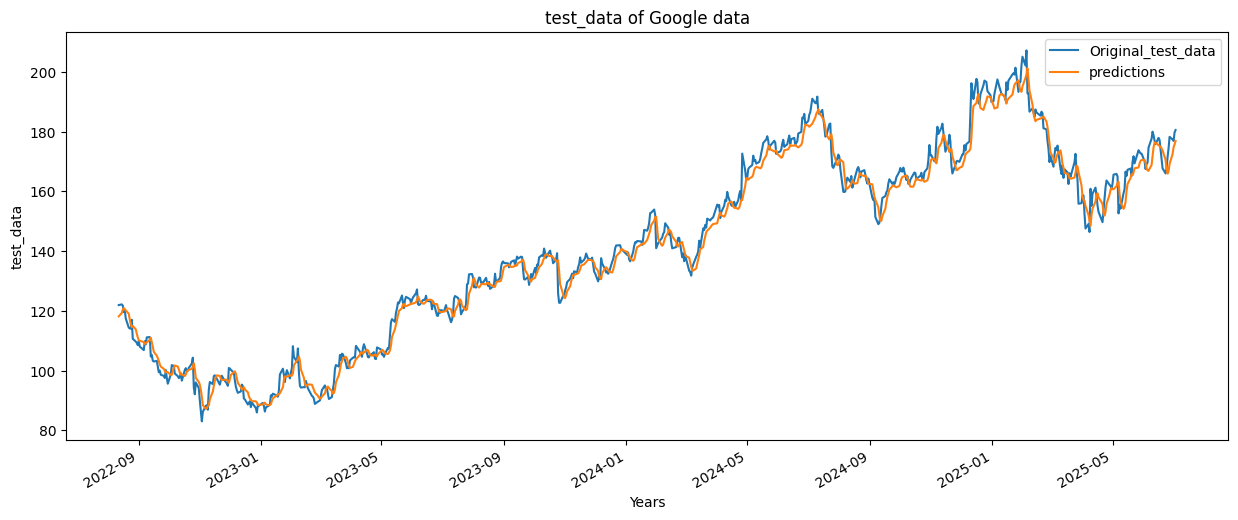

In [92]:
plot_graph((15,6),ploting_data,'test_data')

<Figure size 640x480 with 0 Axes>

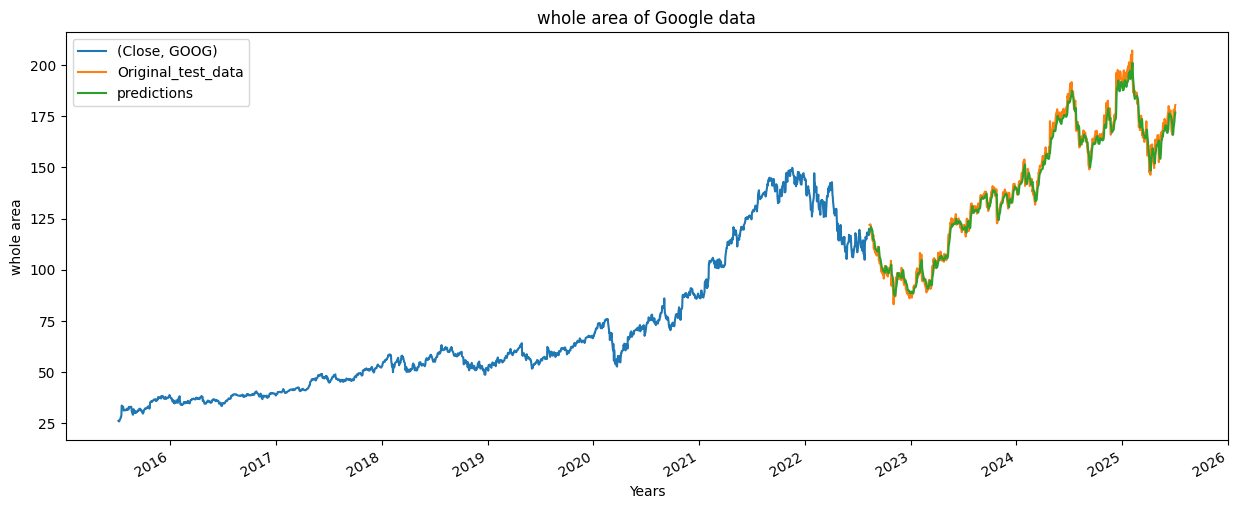

In [93]:
plot_graph((15,6),pd.concat([close_price[:splitting_len+100],ploting_data],axis = 0),'whole area')

In [94]:
model.save("Latest_stock_price_model.keras")